### Importing ml libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)

### Importing Data

In [4]:
import os
import aoai

In [5]:
DATA_DESCRIPTION  = os.path.join(aoai.BASE_DIR, 'dataset', "movie-genre-data", "description.txt")
TEST_DATA = os.path.join(aoai.BASE_DIR, 'dataset', "movie-genre-data", "test_data.txt")
TRAIN_DATA = os.path.join(aoai.BASE_DIR, 'dataset', "movie-genre-data", "train_data.txt")
TEST_DATA_SOLUTION = os.path.join(aoai.BASE_DIR, 'dataset', "movie-genre-data", "test_data_solution.txt")

In [6]:
df_train = pd.read_csv(TRAIN_DATA, sep=":::", names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine="python")
x_test = pd.read_csv(TEST_DATA, sep=":::", names=['ID', 'TITLE', 'DESCRIPTION'], engine="python")
df_test_sol = pd.read_csv(TEST_DATA_SOLUTION, sep=":::", names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine="python")

In [7]:
df_train.head(3)

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...


In [8]:
x_test.head(3)

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...


In [9]:
df_test_sol.head(3)

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [11]:
df_test_sol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   GENRE        54200 non-null  object
 3   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


### Plotting

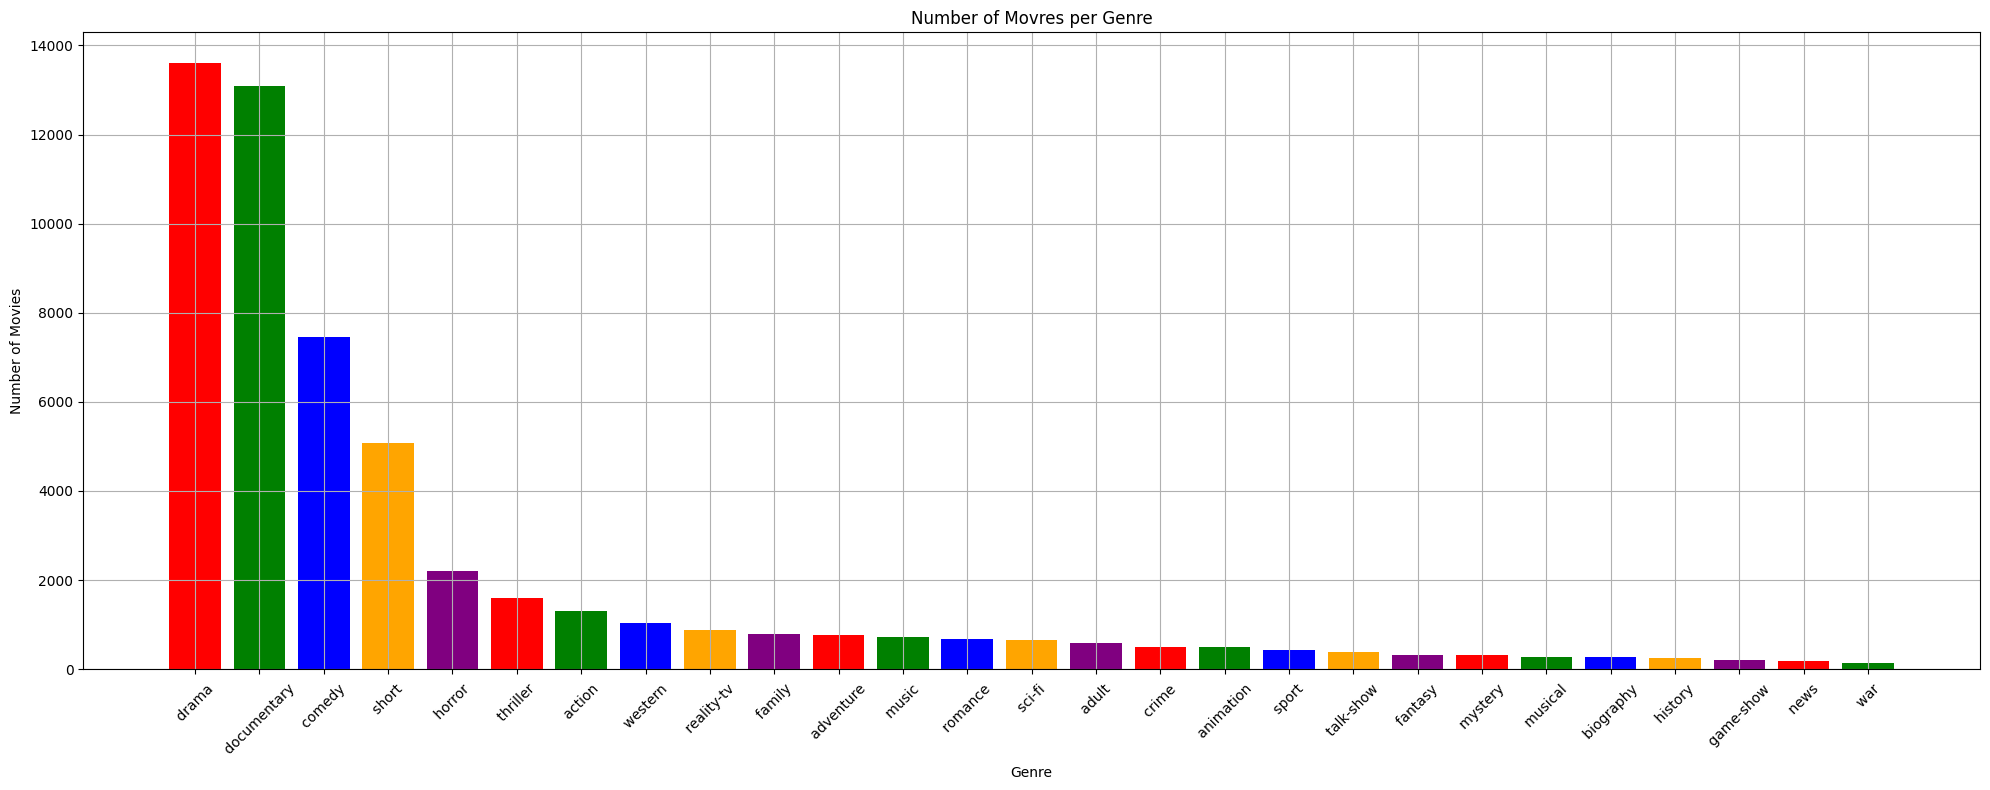

In [12]:
genre_counts = df_train['GENRE'].value_counts()

plt.figure(figsize=(20, 8))

# genre_counts.index returns `genre`
plt.bar(genre_counts.index, genre_counts.values, color=['red', 'green', 'blue', 'orange', 'purple'])

plt.title("Number of Movres per Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

In [13]:
most_watched_genre = genre_counts.idxmax()

print("The most watched genre is:", most_watched_genre)

The most watched genre is:  drama 


In [14]:
df_train = df_train.drop(columns=["ID"], axis=1)
x_test = x_test.drop(columns=["ID"], axis=1)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train["GENRE"] = le.fit_transform(df_train['GENRE'])
df_test_sol["GENRE"] = le.fit_transform(df_test_sol['GENRE'])

In [16]:
df_train['combined_text'] = df_train['TITLE'] + " " + df_train["DESCRIPTION"]
x_test['combined_text'] = x_test['TITLE'] + " " + x_test["DESCRIPTION"]

In [18]:
X_train = df_train.drop(["GENRE", "DESCRIPTION", "TITLE"], axis=1)

X_test = x_test.drop(["DESCRIPTION", "TITLE"], axis=1)

In [23]:
y_train = df_train['GENRE']
y_test = df_test_sol['GENRE']

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer on X_train
tfidf_vectorizer.fit(X_train['combined_text'])

X_train = tfidf_vectorizer.transform(X_train['combined_text'])
X_test = tfidf_vectorizer.transform(X_test['combined_text'])

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [30]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [31]:
log_model = LogisticRegression(C=1)
log_model.fit(x_train, y_train)

c:\Users\91930\Documents\GITHUB\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [32]:
y_train_pred1 = log_model.predict(x_train)
print(classification_report(y_train, y_train_pred1))

              precision    recall  f1-score   support

           0       0.79      0.40      0.53      1162
           1       0.91      0.36      0.52       524
           2       0.87      0.26      0.40       686
           3       0.92      0.11      0.19       445
           4       0.00      0.00      0.00       244
           5       0.72      0.80      0.75      6726
           6       0.77      0.05      0.10       443
           7       0.74      0.94      0.83     11816
           8       0.65      0.92      0.76     12288
           9       0.80      0.15      0.26       713
          10       1.00      0.02      0.03       294
          11       0.93      0.59      0.72       175
          12       0.00      0.00      0.00       214
          13       0.83      0.74      0.78      1974
          14       0.87      0.54      0.67       667
          15       0.86      0.02      0.05       250
          16       1.00      0.01      0.02       283
          17       0.92    

c:\Users\91930\Documents\GITHUB\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91930\Documents\GITHUB\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91930\Documents\GITHUB\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [33]:
y_val_pred1 = log_model.predict(x_val)
print(classification_report(y_val, y_val_pred1))

              precision    recall  f1-score   support

           0       0.58      0.18      0.28       153
           1       0.88      0.21      0.34        66
           2       0.47      0.09      0.15        89
           3       1.00      0.06      0.11        53
           4       0.00      0.00      0.00        21
           5       0.57      0.63      0.60       721
           6       0.33      0.02      0.03        62
           7       0.63      0.87      0.73      1280
           8       0.53      0.82      0.64      1325
           9       0.71      0.07      0.13        71
          10       0.00      0.00      0.00        29
          11       0.83      0.53      0.65        19
          12       0.00      0.00      0.00        29
          13       0.71      0.54      0.61       230
          14       0.67      0.31      0.43        64
          15       0.00      0.00      0.00        27
          16       0.00      0.00      0.00        36
          17       0.00    

c:\Users\91930\Documents\GITHUB\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91930\Documents\GITHUB\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91930\Documents\GITHUB\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [34]:
y_test_pred1 = log_model.predict(X_test)
print(classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

           0       0.54      0.24      0.33      1314
           1       0.64      0.16      0.26       590
           2       0.72      0.18      0.28       775
           3       0.56      0.01      0.02       498
           4       0.00      0.00      0.00       264
           5       0.55      0.57      0.56      7446
           6       0.42      0.02      0.04       505
           7       0.65      0.87      0.74     13096
           8       0.53      0.80      0.64     13612
           9       0.56      0.07      0.12       783
          10       0.00      0.00      0.00       322
          11       0.84      0.51      0.64       193
          12       0.00      0.00      0.00       243
          13       0.68      0.55      0.61      2204
          14       0.72      0.39      0.51       731
          15       1.00      0.00      0.01       276
          16       1.00      0.00      0.01       318
          17       0.73    

c:\Users\91930\Documents\GITHUB\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91930\Documents\GITHUB\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91930\Documents\GITHUB\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [35]:
from sklearn.svm import LinearSVC

In [38]:
svc_model = LinearSVC(penalty="l2", C=0.1, dual=False)
svc_model.fit(x_train, y_train)

LinearSVC(C=0.1, dual=False)

In [40]:
y_train_pred2 = svc_model.predict(x_train)
print(classification_report(y_train, y_train_pred2))

              precision    recall  f1-score   support

           0       0.90      0.51      0.65      1162
           1       0.97      0.59      0.73       524
           2       0.95      0.38      0.55       686
           3       0.98      0.36      0.53       445
           4       0.00      0.00      0.00       244
           5       0.76      0.78      0.77      6726
           6       1.00      0.17      0.29       443
           7       0.74      0.95      0.83     11816
           8       0.66      0.91      0.77     12288
           9       0.93      0.25      0.39       713
          10       0.97      0.22      0.36       294
          11       0.93      0.81      0.87       175
          12       0.00      0.00      0.00       214
          13       0.81      0.83      0.82      1974
          14       0.90      0.66      0.76       667
          15       0.97      0.12      0.21       250
          16       1.00      0.18      0.31       283
          17       0.94    

c:\Users\91930\Documents\GITHUB\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91930\Documents\GITHUB\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91930\Documents\GITHUB\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [42]:
y_val_pred2 = svc_model.predict(x_val)
print(classification_report(y_val, y_val_pred2))

              precision    recall  f1-score   support

           0       0.67      0.21      0.32       153
           1       0.76      0.20      0.31        66
           2       0.53      0.10      0.17        89
           3       1.00      0.06      0.11        53
           4       0.00      0.00      0.00        21
           5       0.58      0.61      0.59       721
           6       1.00      0.02      0.03        62
           7       0.62      0.90      0.73      1280
           8       0.53      0.81      0.64      1325
           9       0.60      0.04      0.08        71
          10       0.00      0.00      0.00        29
          11       0.75      0.63      0.69        19
          12       0.00      0.00      0.00        29
          13       0.63      0.60      0.62       230
          14       0.59      0.27      0.37        64
          15       0.00      0.00      0.00        27
          16       0.00      0.00      0.00        36
          17       0.00    

c:\Users\91930\Documents\GITHUB\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91930\Documents\GITHUB\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91930\Documents\GITHUB\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [43]:
y_test_pred2=svc_model.predict(X_test)
print(classification_report(y_test,y_test_pred2))

              precision    recall  f1-score   support

           0       0.55      0.23      0.33      1314
           1       0.67      0.23      0.35       590
           2       0.72      0.17      0.28       775
           3       0.64      0.04      0.07       498
           4       0.00      0.00      0.00       264
           5       0.56      0.55      0.56      7446
           6       0.71      0.01      0.02       505
           7       0.64      0.89      0.74     13096
           8       0.54      0.80      0.64     13612
           9       0.62      0.08      0.13       783
          10       0.56      0.02      0.03       322
          11       0.79      0.60      0.68       193
          12       0.00      0.00      0.00       243
          13       0.64      0.62      0.63      2204
          14       0.68      0.39      0.49       731
          15       0.67      0.01      0.01       276
          16       0.00      0.00      0.00       318
          17       0.82    

c:\Users\91930\Documents\GITHUB\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91930\Documents\GITHUB\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\91930\Documents\GITHUB\ArtOfAI\venv\artofai\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [44]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
def predict_genre(title, description, model, vectorizer, label_encoder):
    data = pd.DataFrame({"TITLE": [title], "DESCRIPTION": [description]})
    
    data['combined_text'] = data['TITLE'] + " " + data['DESCRIPTION']
    
    X_new = vectorizer.transform(data['combined_text'])
    
    y_pred = model.predict(X_new)
    
    predict_genre = label_encoder.inverse_transform(y_pred)[0]
    
    return predict_genre

In [46]:
predict_genre("Edgar's Lunch (1998)","L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa.",svc_model,tfidf_vectorizer,le)

' drama '